In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mtp
mtp.rcParams["pdf.fonttype"] = 42

# load

In [2]:
fdir = "C:/Data/Lab/ZanettiLab/HNSC_TERT_project/data/rna_seq/result/"
hnsc_res = pd.read_csv(fdir + "hnsc_dif.csv",index_col=0)
brca_res = pd.read_csv(fdir + "brca_dif.csv",index_col=0)

In [3]:
hnsc_res[hnsc_res["logFC"] >0].shape

(2464, 6)

In [4]:
hnsc_res[hnsc_res["logFC"] <=0].shape

(2955, 6)

In [5]:
hnsc_res[(hnsc_res["logFC"] >0.5) & (hnsc_res["logCPM"] >2.5)].shape

(660, 6)

In [6]:
hnsc_res[(hnsc_res["logFC"] <-0.5) & (hnsc_res["logCPM"] >2.5)].shape

(1180, 6)

In [7]:
hnsc_up = hnsc_res[hnsc_res["logFC"] > 0]
hnsc_down = hnsc_res[hnsc_res["logFC"] < 0]

In [8]:
def up_selectby_cpm_fc(df):
    up_genes = df[(df["logCPM"] > 2.5) & (df["logFC"] > .5)].dropna()["gene"].tolist()
    return up_genes

hnsc_up_mod = up_selectby_cpm_fc(hnsc_up)

In [9]:
def down_selectby_cpm_fc(df):
    down_genes = df[(df["logCPM"] > 2.5) & (df["logFC"] < -.5)].dropna()["gene"].tolist()
    return down_genes

hnsc_down_mod = down_selectby_cpm_fc(hnsc_down)

# Plots - Pathway barplot

In [10]:
hnsc_rnaseq = pd.read_csv("C:/Data/Lab/ZanettiLab/HNSC_TERT_project/data/rna_seq/hnsc_all.rawcounts.csv",index_col=0)
brca_rnaseq = pd.read_csv("C:/Data/Lab/ZanettiLab/HNSC_TERT_project/data/rna_seq/brca_all.rawcounts.csv",index_col=0)

In [11]:
hnsc_rnaseq.dropna(subset = ["genes"],inplace = True)
hnsc_rnaseq.set_index("genes",inplace = True)
tert_exp = hnsc_rnaseq.loc["TERT"]
tert_cut = pd.cut(tert_exp, bins = [-np.inf, np.quantile(tert_exp,q = .3), np.quantile(tert_exp,q = .7), np.inf], labels = ["LOW","MID","HIGH"])

bcell = ["CD19","MS4A1"]
b_exp = sp.stats.gmean(hnsc_rnaseq.loc[bcell])
b_cut = pd.cut(b_exp, bins = [-np.inf, np.quantile(b_exp,q = .3), np.quantile(b_exp,q = .7), np.inf], labels = ["LOW","MID","HIGH"])



C:\Users\mistu\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [12]:
bhi_terthi = np.where((b_cut == "HIGH") & (tert_cut == "HIGH"))[0]
bhi_terthi = list(hnsc_rnaseq.columns[bhi_terthi])
bhi_tertlo = np.where((b_cut == "HIGH") & (tert_cut == "LOW"))[0]
bhi_tertlo = list(hnsc_rnaseq.columns[bhi_tertlo])

In [13]:
genelist = """BCL2, CD22, CD320, CD40, CD79B, PAX5, BATF, IL21R, IL27RA, IL2RG, IL1R2, LCK, VCAM1, ZAP70, CCL19, CCL20, CXCR4, GZMA, GZMB, LTB, PRF1, ANGPTL2, CD109, CCL2, CCL22, IL33, ITGA7, PCSK5, PCSK6, TGFBR2, TGFBR3, AREG, IGF2""".split(", ")
# 
# removed TGFB1

# Figure 5

### Panel B-C

In [14]:
hnsc_up = pd.read_csv("C:/Data/Lab/ZanettiLab/HNSC_TERT_project/data/rna_seq/gProfiler_hnsc_up.csv")
hnsc_down = pd.read_csv("C:/Data/Lab/ZanettiLab/HNSC_TERT_project/data/rna_seq/gProfiler_hnsc_down.csv")

def plot_bar(term, group, palette, figsize = (6,12)):
    
    df = group.set_index("term_name").loc[term][["negative_log10_of_adjusted_p_value"]].reset_index()
    plt.figure(figsize = figsize)
    sns.barplot(x = "negative_log10_of_adjusted_p_value", y = "term_name",palette = palette ,data = df.sort_values(by = "negative_log10_of_adjusted_p_value",ascending = False))

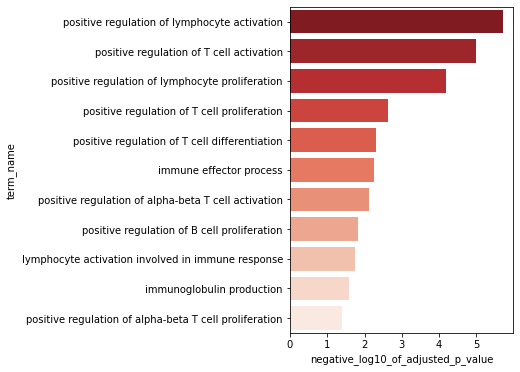

In [15]:
terms=[
    'positive regulation of lymphocyte activation',
    'positive regulation of T cell activation',
    #'positive regulation of immune system process',
    #'positive regulation of leukocyte activation',
    'positive regulation of lymphocyte proliferation',
    'positive regulation of T cell proliferation',
    'positive regulation of T cell differentiation',
    'positive regulation of alpha-beta T cell activation',
    #'positive regulation of immune response',
    'positive regulation of alpha-beta T cell proliferation',
    'positive regulation of B cell proliferation',
    'lymphocyte activation involved in immune response',
    'immune effector process',
    'immunoglobulin production',
]

plot_bar(terms, hnsc_up,"Reds_r",figsize = (4,6))
fdir = "C:/Data/Lab/ZanettiLab/HNSC_TERT_project/data/rna_seq/result/"
#plt.savefig(fdir + "HNSC_up_pathway_imm_barplot.pdf",bbox_inches = "tight")

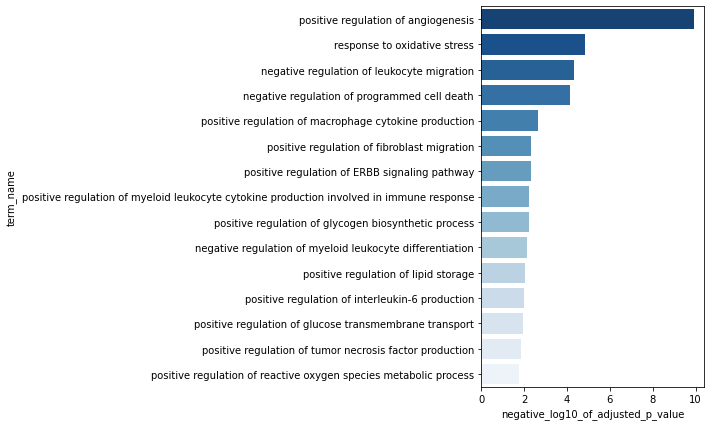

In [16]:
#reset_color_text(COLOR = "k")
down_terms = ["positive regulation of angiogenesis",
              "response to oxidative stress",
              "negative regulation of leukocyte migration",
              "negative regulation of programmed cell death",
              "positive regulation of macrophage cytokine production",
              "positive regulation of fibroblast migration",
              "positive regulation of ERBB signaling pathway",
              "positive regulation of myeloid leukocyte cytokine production involved in immune response",
              "positive regulation of glycogen biosynthetic process",
              "negative regulation of myeloid leukocyte differentiation",
              "positive regulation of lipid storage",
              "positive regulation of interleukin-6 production",
              "positive regulation of glucose transmembrane transport",
              "positive regulation of tumor necrosis factor production",
              "positive regulation of reactive oxygen species metabolic process"]

plot_bar(down_terms, hnsc_down, "Blues_r",figsize = (4,7))
fdir = "C:/Data/Lab/ZanettiLab/HNSC_TERT_project/data/rna_seq/result/"
#plt.savefig(fdir + "HNSC_down_pathway_barplot_v2.pdf",bbox_inches = "tight")

### Panel D

In [17]:
def fc_heatmap_antigen(hnsc_rnaseq = hnsc_rnaseq, refgene_list = ["TERT","MUC1","MAGEA4","MAGEA3","CEACAM5"]):
    
    #refgene_list = "TERT"
    hnsc_logfc = {}
    for refgene in refgene_list:
        tert_exp = hnsc_rnaseq.loc[refgene]
        tert_cut = pd.cut(tert_exp, bins = [-np.inf, np.quantile(tert_exp,q = .3), np.quantile(tert_exp,q = .7), np.inf], labels = ["LOW","MID","HIGH"])

        bcell = ["CD19","MS4A1"]
        b_exp = sp.stats.gmean(hnsc_rnaseq.loc[bcell])
        b_cut = pd.cut(b_exp, bins = [-np.inf, np.quantile(b_exp,q = .3), np.quantile(b_exp,q = .7), np.inf], labels = ["LOW","MID","HIGH"])


        bhi_terthi = np.where((b_cut == "HIGH") & (tert_cut == "HIGH"))[0]
        bhi_terthi = list(hnsc_rnaseq.columns[bhi_terthi])
        bhi_tertlo = np.where((b_cut == "HIGH") & (tert_cut == "LOW"))[0]
        bhi_tertlo = list(hnsc_rnaseq.columns[bhi_tertlo])

        hnsc_logfc[refgene] = np.log2(hnsc_rnaseq.loc[genelist][bhi_terthi].mean(axis=1) / hnsc_rnaseq.loc[genelist][bhi_tertlo].mean(axis=1))
    
    refgene = "CTAG1B"
    tert_exp = hnsc_rnaseq.loc[refgene]
    tert_cut = pd.cut(tert_exp, bins = [-np.inf, 0.00001, np.inf], labels = ["LOW","HIGH"])

    bcell = ["CD19","MS4A1"]
    b_exp = sp.stats.gmean(hnsc_rnaseq.loc[bcell])
    b_cut = pd.cut(b_exp, bins = [-np.inf, np.quantile(b_exp,q = .3), np.quantile(b_exp,q = .7), np.inf], labels = ["LOW","MID","HIGH"])


    bhi_terthi = np.where((b_cut == "HIGH") & (tert_cut == "HIGH"))[0]
    bhi_terthi = list(hnsc_rnaseq.columns[bhi_terthi])
    bhi_tertlo = np.where((b_cut == "HIGH") & (tert_cut == "LOW"))[0]
    bhi_tertlo = list(hnsc_rnaseq.columns[bhi_tertlo])

    hnsc_logfc[refgene] = np.log2(hnsc_rnaseq.loc[genelist][bhi_terthi].mean(axis=1) / hnsc_rnaseq.loc[genelist][bhi_tertlo].mean(axis=1))

    return hnsc_logfc
df_fc_antigens = fc_heatmap_antigen()

C:\Users\mistu\AppData\Roaming\Python\Python38\site-packages\scipy\stats\stats.py:330: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(np.array(a, dtype=dtype))


In [18]:
dfplot = pd.DataFrame(df_fc_antigens)
g2 = sns.clustermap(dfplot)
plt.close()

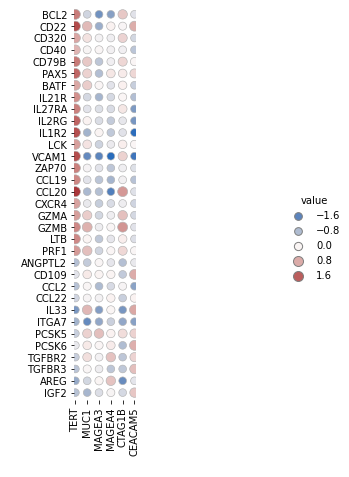

In [19]:
#cols = ["TERT","CTAG1B","MUC1","CEACAM5","MAGEA4","MAGEA3"]
cols = ["TERT","MUC1","MAGEA3","MAGEA4","CTAG1B","CEACAM5",]
g = sns.relplot(
    data=g2.data2d.loc[genelist][cols].T.reset_index().melt(id_vars = ["index"]),
    x="index", y="genes", hue="value",  size="value",
    palette="vlag", hue_norm=(-2, 2), edgecolor=".7",
    height=6, sizes=(60, 100), size_norm=(-.2, .8),
)
# Tweak the figure to finalize
g.set(xlabel=" ", ylabel=" ", aspect="equal")
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor(".5")
    

fdir = "C:/Data/Lab/ZanettiLab/HNSC_TERT_project/data/rna_seq/result/"
#plt.savefig(fdir + "logfc_plot_antigen_v2.pdf",bbox_inches="tight")